# **Hypothesis Testing**


## Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats

Read in the csv file from the URL using the request library


In [3]:
url = 'https://github.com/YannadatchO/Workspace/raw/main/teachingratings.csv'
ratings_df = pd.read_csv(url)

### Data discriptions
| Variable    | Description                                                                                                                                          |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| minority    | Does the instructor belong to a minority (non-Caucasian) group?                                                                                      |
| age         | The professor's age                                                                                                                                  |
| gender      | Indicating whether the instructor was male or female.                                                                                                |
| credits     | Is the course a single-credit elective?                                                                                                              |
| beauty      | Rating of the instructor's physical appearance by a panel of six students averaged across the six panelists and standardized to have a mean of zero. |
| eval        | Course overall teaching evaluation score, on a scale of 1 (very unsatisfactory) to 5 (excellent).                                                    |
| division    | Is the course an upper or lower division course?                                                                                                     |
| native      | Is the instructor a native English speaker?                                                                                                          |
| tenure      | Is the instructor on a tenure track?                                                                                                                 |
| students    | Number of students that participated in the evaluation.                                                                                              |
| allstudents | Number of students enrolled in the course.                                                                                                           |
| prof        | Indicating instructor identifier.                                                                                                                    |


In [4]:
ratings_df.head(5)


,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


## Lab Exercises

## T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in evaluation scores between male and females")


We can plot the dependent variable with a historgram

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal distribution')]

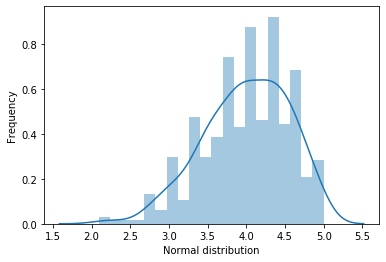

In [58]:
ax = sns.distplot(ratings_df['eval'], 
                         bins = 20,
                         kde = True)
ax.set(xlabel = 'Normal distribution' , ylabel = 'Frequency')
## we can assume it is normal

We can use the Levene's Test in Python to check test significance

In [59]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'male']['eval'],
                         ratings_df[ratings_df['gender'] == 'female']['eval'], center ='mean')
# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=0.1903292243529225, pvalue=0.6628469836244741)

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library

In [60]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'male']['eval'],
                              ratings_df[ratings_df['gender'] == 'female']['eval'], equal_var = True)

Ttest_indResult(statistic=3.249937943510772, pvalue=0.0012387609449522217)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender

### <span style='color:Red'> Q : Does gender affect teaching evaluation rates? 
### <span style='color:Red'> A : Reject H0 : there is enough proof that there is a statistical difference in teaching evaluations based on gender

## ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older

create a new column for this newly assigned group our categories name = 'age_group'

In [27]:
ratings_df.loc[(ratings_df['age'] <= 40 ), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40 )&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

In [32]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

summary table

In [44]:
ratings_df.groupby('age_group').agg({'beauty' : ['count','mean','std']}).reset_index()

age_group beauty                    
                            count      mean       std
0     40 years and younger    113  0.336196  0.913748
1       57 years and older    122 -0.245777  0.740720
2  between 40 and 57 years    228 -0.035111  0.686637

State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


Test for equality of variance

In [61]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                         ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'],
                         ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], center ='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=8.60005668392585, pvalue=0.0002153661809934714)

First, separate the three samples (one for each job category) into a variable each.


In [62]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older =  ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

Now, run a one-way ANOVA.

In [74]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower,forty_fiftyseven,fiftyseven_older )
print("F_statistic :{0}, P_value : {1}".format(f_statistic,p_value))

F_statistic :17.597558611010122, P_value : 4.3225489816137975e-08


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### <span style='color:Red'> Q : Does beauty score for instructors differ by age?
### <span style='color:Red'> A : Reject H0 (the three population means are equal) : there is significant evidence that at least one of the means differ

## ANOVA: Using the teachers' rating data set, does teaching  evaluation  score for instructors  differ  by age?

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


In [97]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] <40)&(ratings_df['age']>57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df)['age'] >= 57 ,'age_group'] = '57 years and older'

State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


Test for equality of variance

In [98]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['eval'],
                          ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval'],
                          ratings_df[ratings_df['age_group'] == '57 years and older']['eval'], center ='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

First, separate the three samples (one for each job category) into a variable each

In [99]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older =  ratings_df[ratings_df['age_group'] == '57 years and older']['eval']

In [100]:
f_statistic,p_value = scipy.stats.f_oneway(forty_lower,forty_fiftyseven,fiftyseven_older)
print ("F_statistic : {0}, P_value : {1}".format(f_statistic,p_value))

F_statistic : 1.2226327996572204, P_value : 0.29540894225417536


**Conclusion:** Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.

## <span style ='color:Red'>Q : Does teaching  evaluation  score for instructors  differ  by age?
## <span style ='color:Red'> A : Accept H0 (the three population means are equal) no significant evidence that at least one of the means differ.

## Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?


State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender


Create a Cross-tab table use <code>pd.crosstab()</code>

In [125]:
count_table = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
count_table

gender,female,male
tenure,,
no,50,52
yes,145,216


Use the <code>scipy.stats</code> library and set correction equals False as that will be the same answer when done by hand, it returns: 𝜒2 value, p-value, degree of freedom, and expected values.

In [102]:
scipy.stats.chi2_contingency(count_table, correction = True)

(2.20678166999886,
 0.1374050603563787,
 1,
 array([[ 42.95896328,  59.04103672],
        [152.04103672, 208.95896328]]))

**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that teachers are tenured as a result of gender.


## <span style = 'color:red'> Q : Is there an association between tenure and gender ?
## <span style = 'color:red' > A : No, Accept H0 :  tenured is independent of gender

## Correlation: Using the teachers rating dataset, Is teaching  evaluation  score correlated with  beauty score?

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

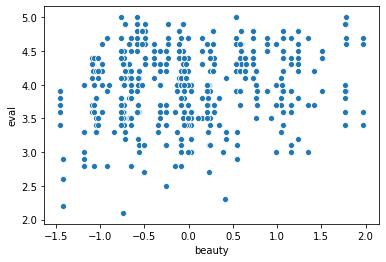

In [107]:
ax = sns.scatterplot(x ='beauty' , y ='eval', data =ratings_df)

In [110]:
pearson_coefficient, p_value = scipy.stats.pearsonr(ratings_df['eval'], ratings_df['beauty'])

In [112]:
print("pearson_coefficient : {0} ,P_value : {1} ".format(pearson_coefficient, p_value ))

pearson_coefficient : 0.18903909084045212 ,P_value : 4.247115419812614e-05 


**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  beauty and teaching evaluation score.

## <Span style = 'color:red'> Q: Is teaching evaluation score correlated with beauty score ?
## <Span style = 'color:red'> A: Reject H0:  conclude that there exists a relationship between beauty and teaching evaluation score

## Practice Questions

### Question 1: Using the teachers rating data set, does tenure affect teaching evaluation scores?

-   Use α = 0.05

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("tenure no affect teaching evaluation scores")
-   $H_1: µ_1 ≠ µ_2$ ("tenure affect teaching evaluation scores")


In [120]:
scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                          ratings_df[ratings_df['tenure'] == 'no']['eval'], center = 'mean')
# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=0.44389295824627123, pvalue=0.5055827160360271)

In [121]:
scipy.stats.ttest_ind(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                             ratings_df[ratings_df['tenure'] == 'no']['eval'],equal_var = True)

Ttest_indResult(statistic=-2.8046798258451777, pvalue=0.005249471210198792)

### <span style = 'color : red'>P_value less than 0.05 so reject Ho : As there evidence that being tenured affects teaching evaluation scores

### Question 2: Using the teachers rating data set, is there an association between age and tenure?

-   Discretize the age into three groups 40 years and youngers, between 40 and 57 years, 57 years and older (This has already been done for you above.)
-   What is your conclusion at α = 0.01 and α = 0.05?


State the hypothesis:

-   $H_0:$ There is no association between age and tenure
-   $H_1:$ There is an association between age and tenure


In [126]:
count_table = pd.crosstab(ratings_df['age_group'],ratings_df['tenure'])
count_table

tenure,no,yes
age_group,,
40 years and youngers,15,98
57 years and older,25,97
between 40 and 57 years,62,166


In [127]:
scipy.stats.chi2_contingency(count_table, correction = True)

(8.749576239010711,
 0.012590809706820843,
 2,
 array([[ 24.89416847,  88.10583153],
        [ 26.87688985,  95.12311015],
        [ 50.22894168, 177.77105832]]))

## <span style ='color:red'> Q : What is your conclusion at α = 0.01 and α = 0.05?
### <span style ='color:red'> A : at α = 0.01 : Accept H0 There is no association between age and tenure
### <span style ='color:red'>      at α = 0.05 : Reject  H0 As there is evidence of an association between age and tenure

### Question 3: Test for equality of variance for beauty scores between tenured and non-tenured instructors

-   Use α = 0.05
-    t-test


State the hypothesis

-   $H_0: µ_1 = µ_2$ ("equality of variance for beauty scores between tenured and non-tenured")
-   $H_1: µ_1 ≠ µ_2$ ("non equality of variance for beauty scores between tenured and non-tenured")


In [138]:
scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['beauty'],
                          ratings_df[ratings_df['tenure'] == 'no']['beauty'], center = 'mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=0.4884241652750455, pvalue=0.4849835158609811)

In [139]:
scipy.stats.ttest_ind(ratings_df[ratings_df['tenure'] == 'yes']['beauty'],
                            ratings_df[ratings_df['tenure'] == 'no']['beauty'], equal_var = True)

Ttest_indResult(statistic=-0.41091752459788655, pvalue=0.6813239497332834)

## <span  style = 'color:red'>Answer : accept Ho : equality of variance of both groups

### Question 4: Using the teachers rating data set, is there an association between visible minorities and tenure?

-   Use α = 0.05


In [146]:
count_table = pd.crosstab(ratings_df['vismin'], ratings_df['tenure'])
count_table

tenure,no,yes
vismin,,
0,92,307
1,10,54


State the hypothesis:

-   $H_0:$ There is no association between visible minority and tenure
-   $H_1:$ There is an association between visible minority and tenure


In [147]:
scipy.stats.chi2_contingency(count_table, correction =True)

(1.3675127484429763,
 0.24223968800237178,
 1,
 array([[ 87.90064795, 311.09935205],
        [ 14.09935205,  49.90064795]]))

## <span  style = 'color:red'>Answer : Accept H0 : no association between visible minority and tenure